
Model Evaluation:
Accuracy: 0.5793599557318085


C:\Users\yashr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yashr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yashr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

      action       0.53      0.27      0.35       263
       adult       0.71      0.21      0.33       112
   adventure       0.41      0.14      0.21       139
   animation       0.65      0.11      0.18       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.55      1443
       crime       0.43      0.03      0.05       107
 documentary       0.66      0.85      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.41      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.63      0.56      0.59       431
       music       0.62      0.47      0.54       144
     musical       1.00      0.02      0.04        50
     mystery       0.00      0.00      0.00        56
   

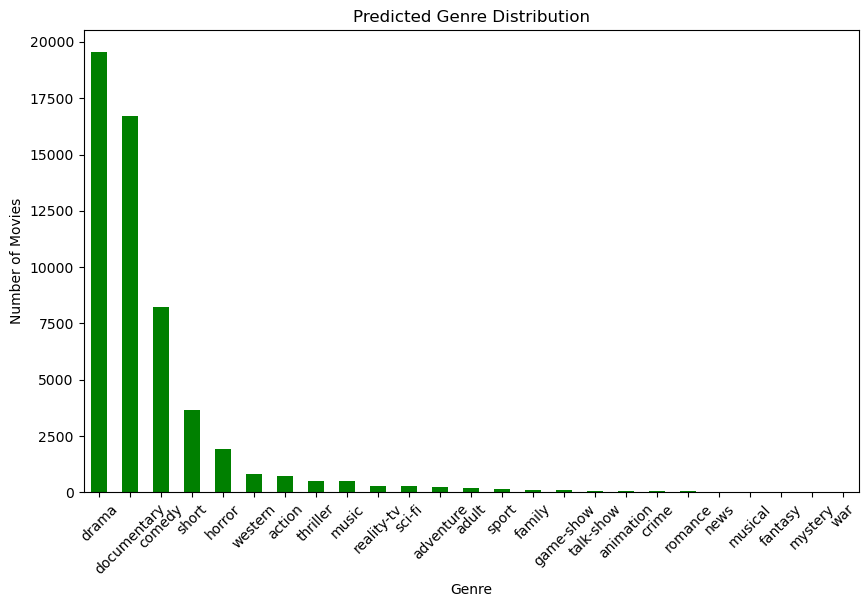


Prediction Table:
   ID                                        Description Predicted Genre
0   1  L.R. Brane loves his life - his car, his apart...           short
1   2  Spain, March 1964: Quico is a very naughty chi...           drama
2   3  One year in the life of Albin and his family o...     documentary
3   4  His father has died, he hasn't spoken with his...           drama
4   5  Before he was known internationally as a marti...           drama
5   6  Emily Burns is being held captive in a room wi...           drama
6   7  The beautiful but neglected wife of a brillian...           drama
7   8  Vasu Inamdar (Ina) suffers from a disorder whe...          comedy
8   9  An insight into the tornados that hit Kensal R...     documentary
9  10  Press is a story of young people overwhelmed b...           drama


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Function to load training data
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:  # Specify UTF-8 encoding
        for line in file:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:  # Ensure correct structure: ID, TITLE, GENRE, DESCRIPTION
                _, _, genre, description = parts
                data.append((genre, description))
    return pd.DataFrame(data, columns=["Genre", "Description"])

# File path to training data
train_data_path = r'C:\Users\yashr\Downloads\archive\Genre Classification Dataset\train_data.txt'

# Load the dataset
df = load_data(train_data_path)

# Preprocessing: Separate features and labels
X = df["Description"]
y = df["Genre"]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_val_tfidf)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Function to predict genres for test data
def predict_genre(test_file_path, vectorizer, model):
    test_data = []
    ids = []
    descriptions = []
    try:
        with open(test_file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split(" ::: ")
                if len(parts) == 3:  # Ensure correct structure: ID, TITLE, DESCRIPTION
                    movie_id, _, description = parts
                    test_data.append(description)
                    ids.append(movie_id)
                    descriptions.append(description)
        test_tfidf = vectorizer.transform(test_data)
        predictions = model.predict(test_tfidf)
        return ids, descriptions, predictions
    except UnicodeDecodeError as e:
        print(f"Error decoding file {test_file_path}: {e}")
        return [], [], []
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return [], [], []

# File path to test data
test_data_path = r'C:\Users\yashr\Downloads\archive\Genre Classification Dataset\test_data.txt'

# Predict genres for test data
ids, descriptions, predicted_genres = predict_genre(test_data_path, vectorizer, model)

# Create a DataFrame for predictions
results_df = pd.DataFrame({
    "ID": ids,
    "Description": descriptions,
    "Predicted Genre": predicted_genres
})

# Display a sample of the predictions
print("\nSample Predictions:")
print(results_df.head())

# Visualize predictions with a bar chart
plt.figure(figsize=(10, 6))
results_df['Predicted Genre'].value_counts().plot(kind='bar', color='green')
plt.title("Predicted Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

# Visualize predictions as a table
print("\nPrediction Table:")
print(results_df.head(10))
